In [265]:
import pandas as pd
import matplotlib.pyplot as plt

загружаем данные

In [266]:
df = pd.read_csv('AAP_data.csv' , index_col='date', parse_dates=['date'])
df

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,78.34,79.7200,78.0100,78.90,1298137,AAP
2013-02-11,78.65,78.9100,77.2300,78.39,758016,AAP
2013-02-12,78.39,78.6300,77.5132,78.60,876859,AAP
2013-02-13,78.90,79.1300,77.8500,78.97,1038574,AAP
2013-02-14,78.66,79.7200,78.5850,78.84,1005376,AAP
...,...,...,...,...,...,...
2018-02-01,116.24,118.8300,115.8300,117.29,760629,AAP
2018-02-02,115.92,117.1800,113.1250,113.93,1092333,AAP
2018-02-05,113.05,114.9700,109.8100,109.86,1281592,AAP


основные статистические показания

In [267]:
df.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,132.439631,133.818297,131.036025,132.433463,1.078043e+06
std,31.269628,31.545809,30.968405,31.274463,1.019365e+06
min,76.040000,76.660000,75.623000,76.180000,1.307120e+05
25%,104.070000,105.724950,102.260000,104.440000,6.182010e+05
50%,141.150000,143.000000,139.405000,141.300000,8.491350e+05
75%,156.980000,158.270000,155.320000,156.730000,1.219762e+06
max,201.240000,201.240000,198.160000,200.380000,1.974952e+07


In [268]:
df.corr()

,open,high,low,close,volume
open,1.000000,0.998957,0.999041,0.998220,-0.062003
high,0.998957,1.000000,0.998468,0.999176,-0.046064
low,0.999041,0.998468,1.000000,0.998940,-0.075223
close,0.998220,0.999176,0.998940,1.000000,-0.061595
volume,-0.062003,-0.046064,-0.075223,-0.061595,1.000000


Визуализируем некоторые данные

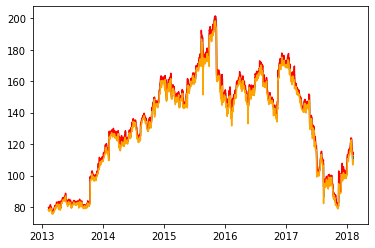

In [269]:
plt.plot(df.index, df['open'])
plt.plot(df['high'], color='red')
plt.plot(df.index, df['low'], color='orange')
plt.show()

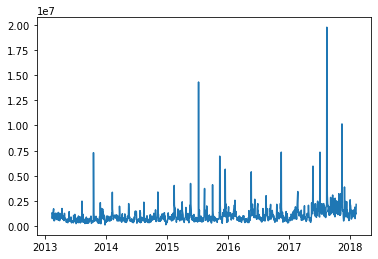

In [270]:
plt.plot(df.index, df.volume)
plt.show()

Удаляем ненужный столбец

In [271]:
df = df.drop(['Name'], axis=1)

In [272]:
df.index.unique()

DatetimeIndex(['2013-02-08', '2013-02-11', '2013-02-12', '2013-02-13',
               '2013-02-14', '2013-02-15', '2013-02-19', '2013-02-20',
               '2013-02-21', '2013-02-22',
               ...
               '2018-01-25', '2018-01-26', '2018-01-29', '2018-01-30',
               '2018-01-31', '2018-02-01', '2018-02-02', '2018-02-05',
               '2018-02-06', '2018-02-07'],
              dtype='datetime64[ns]', name='date', length=1259, freq=None)

создаем временной ряд 

In [273]:
ts = pd.Series(df.volume, index=df.index)
ts_resampled = ts.resample('M').mean()
ts_resampled

date
2013-02-28    9.663027e+05
2013-03-31    9.546372e+05
2013-04-30    9.094860e+05
2013-05-31    6.025893e+05
2013-06-30    6.320912e+05
                  ...     
2017-10-31    1.951085e+06
2017-11-30    2.247606e+06
2017-12-31    1.340712e+06
2018-01-31    1.465079e+06
2018-02-28    1.307777e+06
Freq: M, Name: volume, Length: 61, dtype: float64

рисуем тренд, сезонность и остаток

<Figure size 7200x576 with 0 Axes>

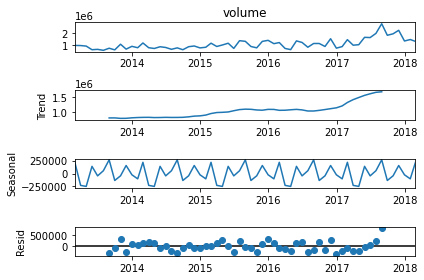

In [274]:
import statsmodels.api as sm

fig = plt.figure(figsize=(100, 8))
decomposition = sm.tsa.seasonal_decompose(ts_resampled)
decomposition.plot()
plt.show()


продолжаем рисовать

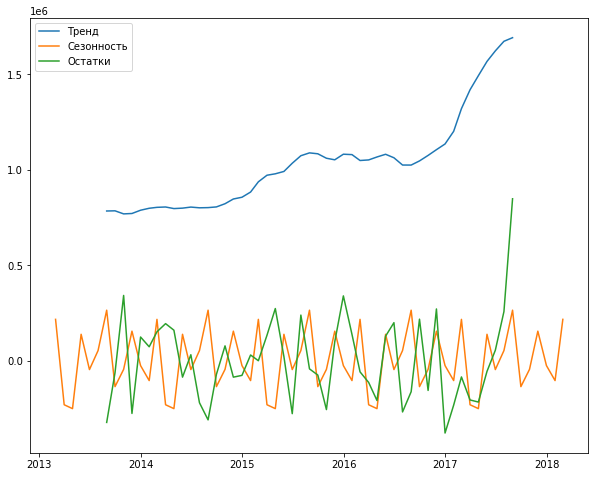

In [275]:
fig, ax = plt.subplots(figsize=(10, 8))
# ax.plot(df['volume'])
ax.plot(decomposition.trend, label='Тренд')

ax.plot(decomposition.seasonal, label='Сезонность')
ax.plot(decomposition.resid, label='Остатки')
ax.legend(loc='best')
plt.show()

In [276]:
df_tr = pd.DataFrame(index=df.index)
df_tr['volume'] = df.volume
df_tr

,volume
date,
2013-02-08,1298137
2013-02-11,758016
2013-02-12,876859
2013-02-13,1038574
2013-02-14,1005376
...,...
2018-02-01,760629
2018-02-02,1092333
2018-02-05,1281592


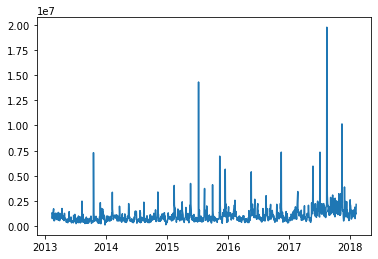

In [277]:
plt.plot(df_tr)
plt.show()


логарифмируем данные для понижения MSE i MAE

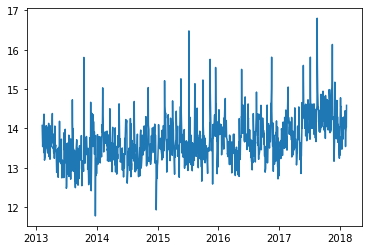

In [278]:
import numpy as np
df_tr.volume = np.log(df_tr['volume'])
# from sklearn.preprocessing import StandardScaler

# # Создать экземпляр класса StandardScaler
# scaler = StandardScaler()

# # Применить метод fit_transform() для стандартизации столбца
# df_tr.volume = scaler.fit_transform(df_tr.volume.values.reshape(-1, 1))


plt.plot(df_tr)
plt.show()

тренируем модель

In [279]:
from statsmodels.tsa.arima.model import ARIMA
# Создать модель ARIMA
model = ARIMA(df_tr, order=(2, 1, 2))

# Обучить модель на данных
model_fit = model.fit()

pred = model_fit.predict(start='2016-02-01', end='2018-02-07')

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


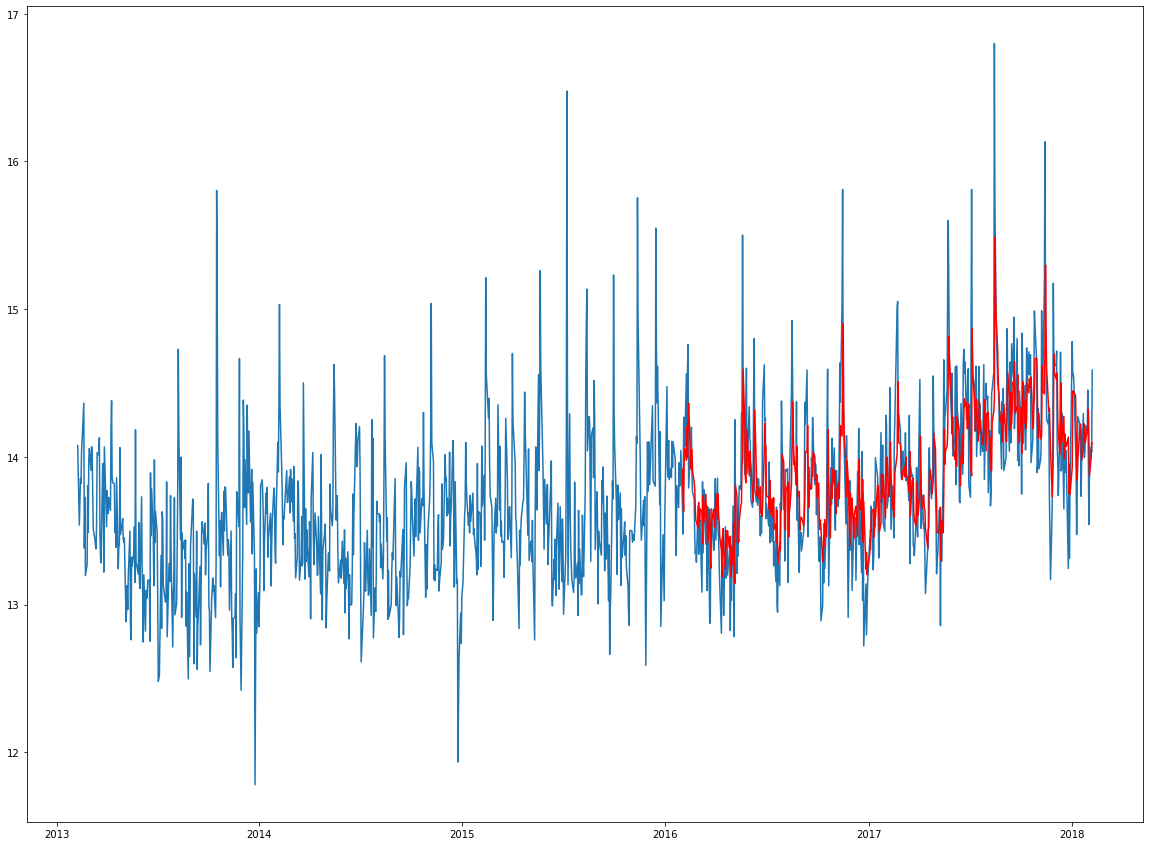

In [280]:
plt.figure(figsize=(20, 15))
plt.plot(df_tr)
plt.plot(pred, color='red')
plt.show()

In [281]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Рассчитываем прогноз с помощью ARIMA модели
forecast = model_fit.forecast(steps=len(df_tr['2016-02-01':'2018-02-07']))

# Рассчитываем MAE и MSE для прогноза
mae = mean_absolute_error(df_tr['2016-02-01':'2018-02-07'], pred)
mse = mean_squared_error(df_tr['2016-02-01':'2018-02-07'], pred)

print('MAE: %.3f' % mae)
print('MSE: %.3f' % mse)

MAE: 0.295
MSE: 0.158


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


Для расчета метрики качества модели ARIMA можно использовать метод aic или bic, которые доступны через атрибут model_fit. Метрики aic и bic являются информационными критериями, которые позволяют оценить качество модели и сравнивать разные модели между собой.

In [282]:
aic_score = model_fit.aic

print("AIC score:", aic_score)
bic_score = model_fit.bic
print("BIC score:", bic_score)

AIC score: 1327.335561024077
BIC score: 1353.0219532103788


In [283]:
df

,open,high,low,close,volume
date,,,,,
2013-02-08,78.34,79.7200,78.0100,78.90,1298137
2013-02-11,78.65,78.9100,77.2300,78.39,758016
2013-02-12,78.39,78.6300,77.5132,78.60,876859
2013-02-13,78.90,79.1300,77.8500,78.97,1038574
2013-02-14,78.66,79.7200,78.5850,78.84,1005376
...,...,...,...,...,...
2018-02-01,116.24,118.8300,115.8300,117.29,760629
2018-02-02,115.92,117.1800,113.1250,113.93,1092333
2018-02-05,113.05,114.9700,109.8100,109.86,1281592


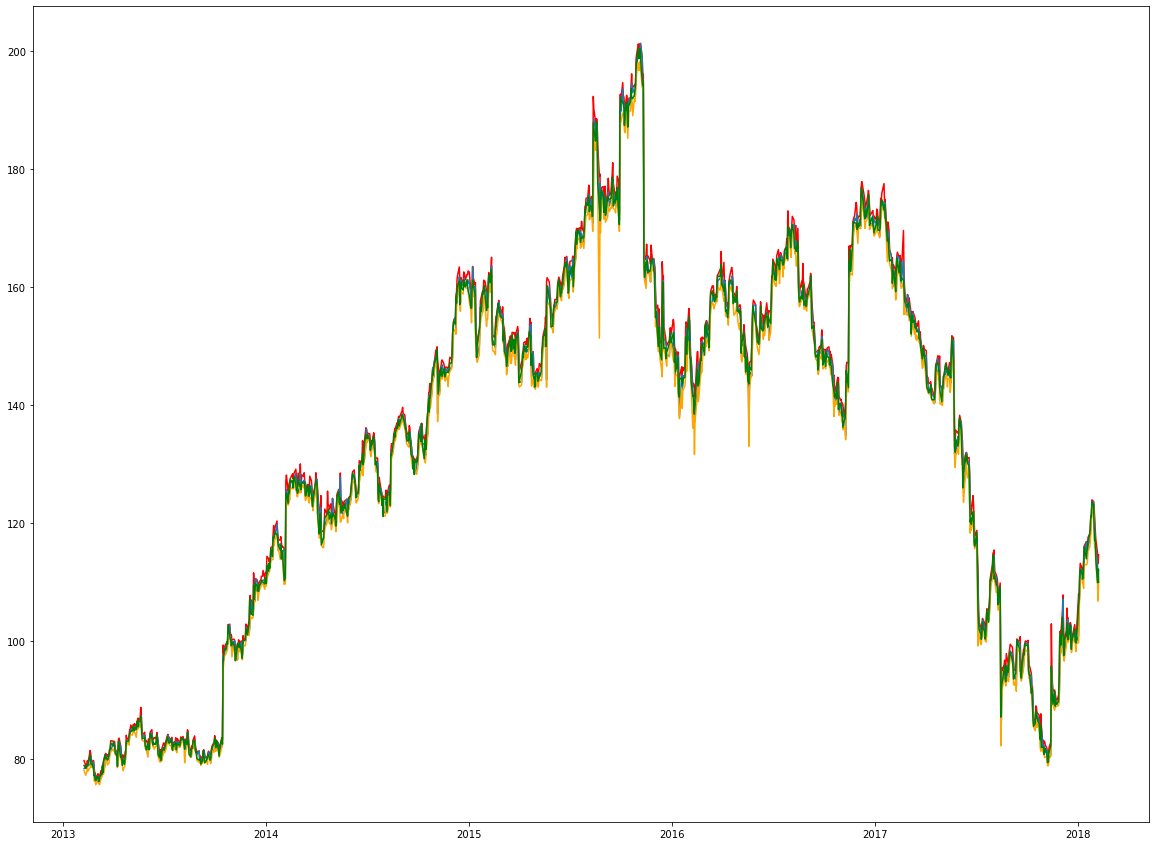

In [284]:
plt.figure(figsize=(20, 15))
plt.plot(df.high, color='red')
plt.plot(df.open)
plt.plot(df.low, color='orange')
plt.plot(df.close, color='green')

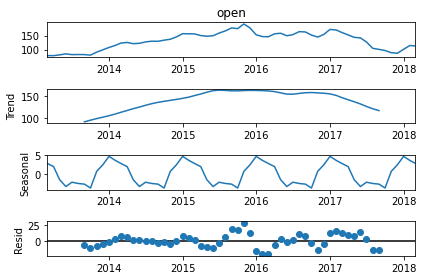

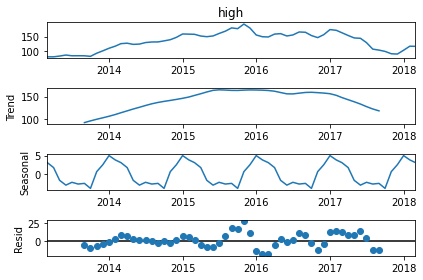

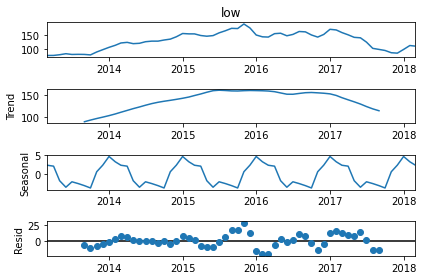

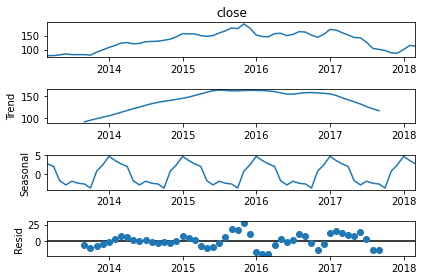

In [285]:
for i in df:
    if i != 'volume':
        ts = pd.Series(df[i], index=df.index)
        ts_resampled = ts.resample('M').mean()
        decomposition = sm.tsa.seasonal_decompose(ts_resampled)
        decomposition.plot()
        plt.show()

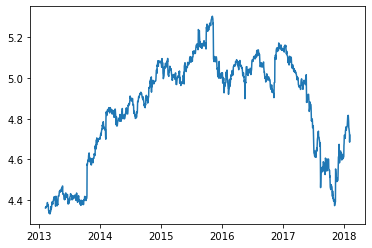

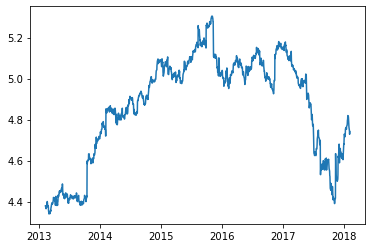

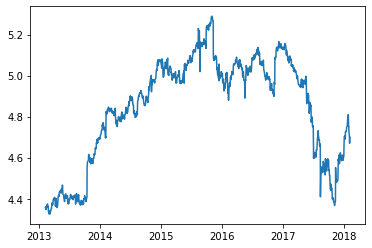

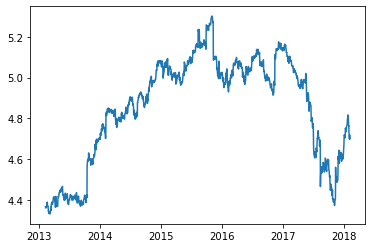

In [286]:
dft = df
for i in df:
    if i != 'volume':
        df[i] = np.log(df[i])
        plt.plot(df[i])
        plt.show()

order(2, 1, 2) подсмотрел у Ивана Беломестова

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


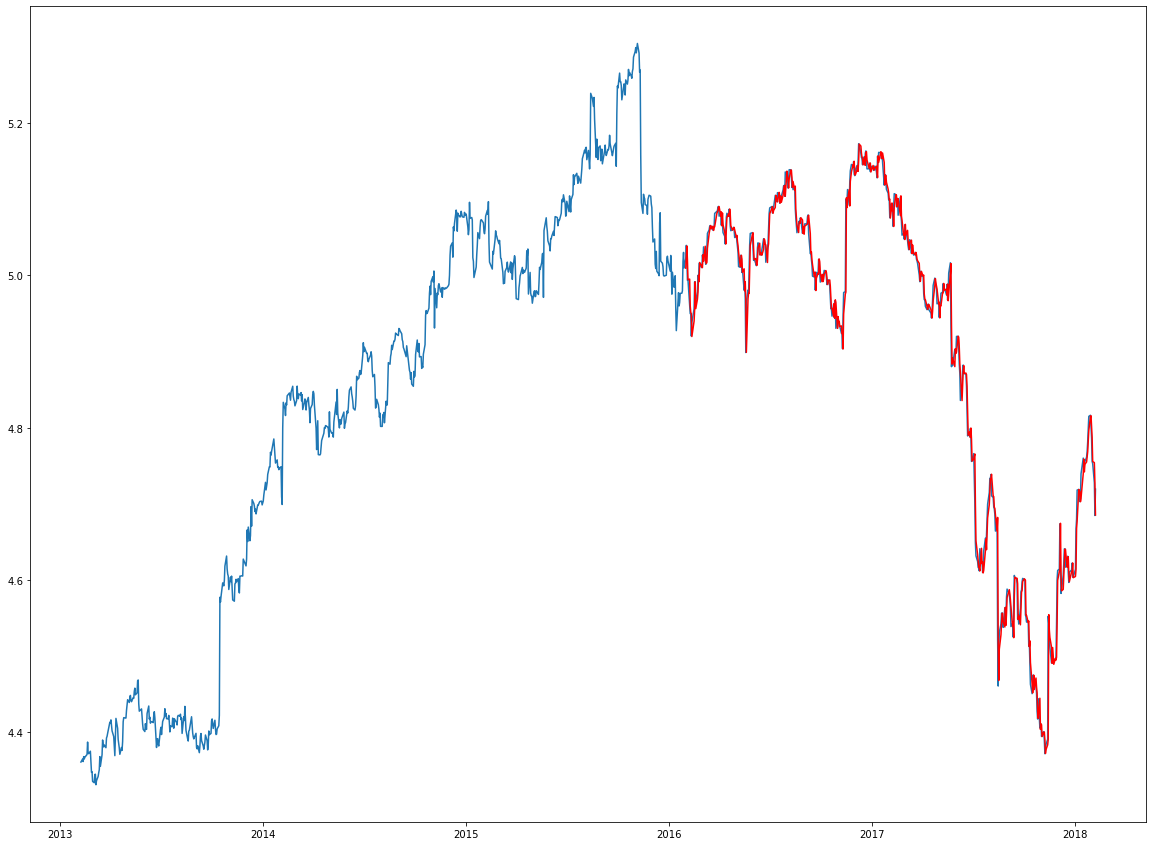

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency informatio

MAE: 9.026
MSE: 81.757


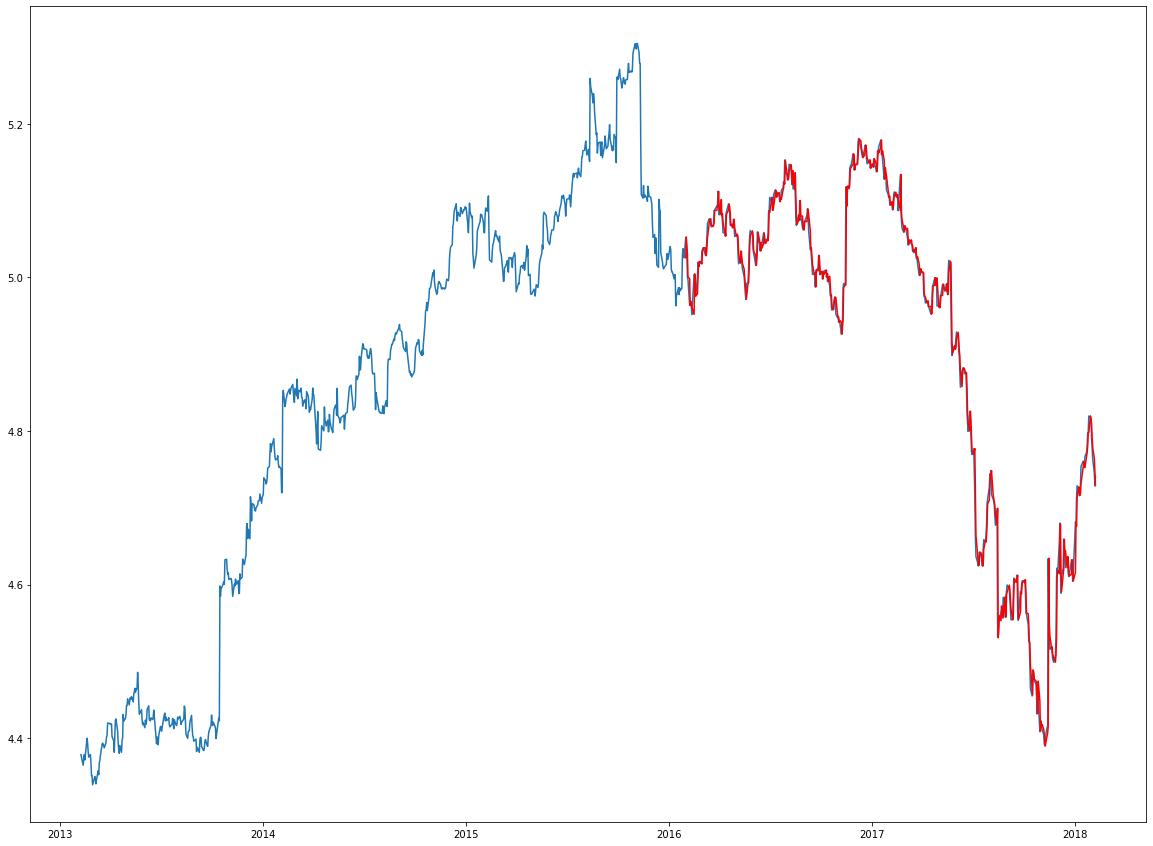

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency informatio

MAE: 9.014
MSE: 81.548


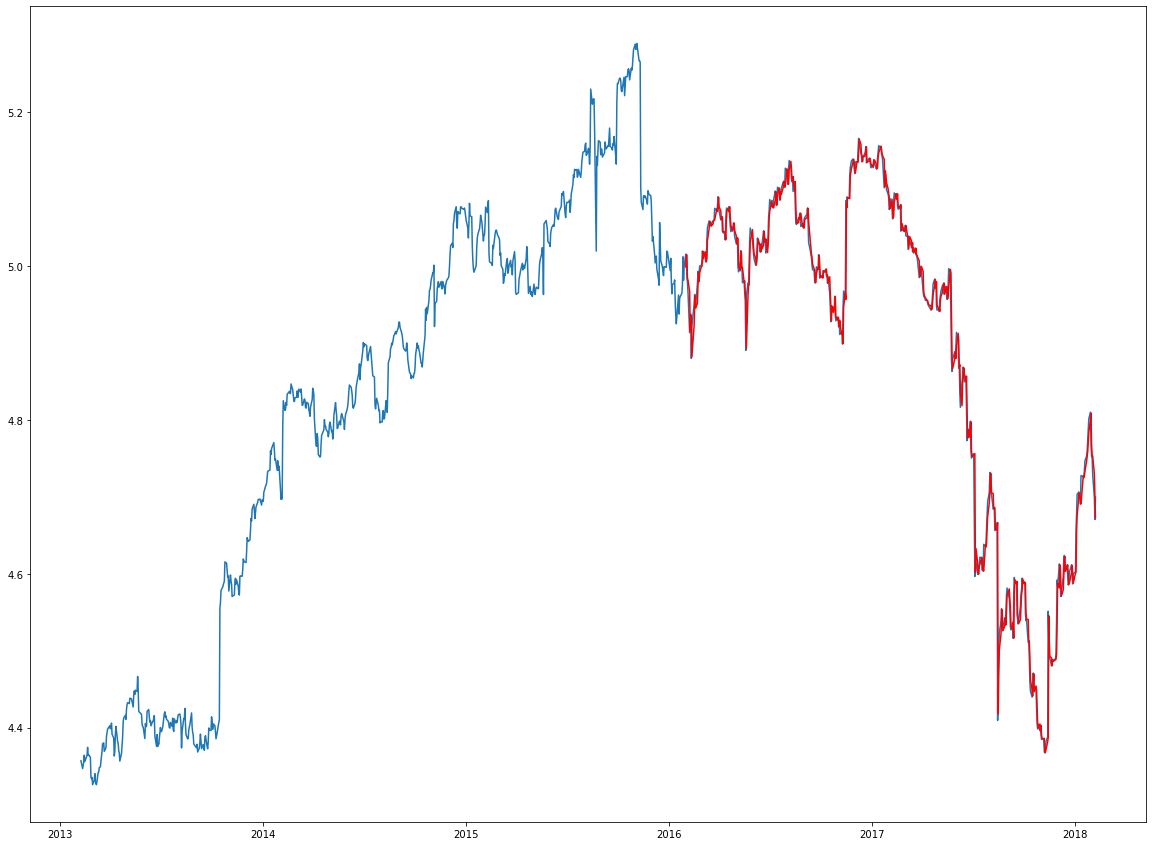

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency informatio

MAE: 9.037
MSE: 81.974


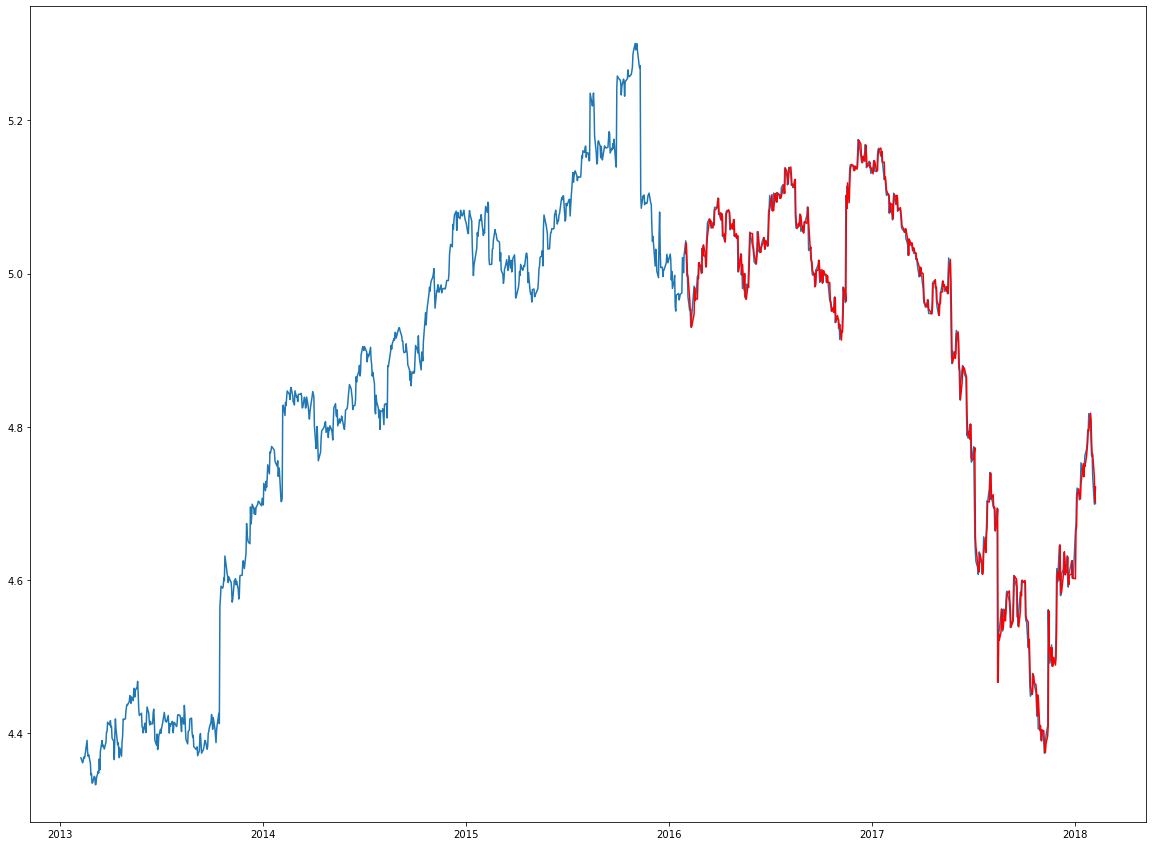

MAE: 9.026
MSE: 81.762


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [288]:
for i in df:
    if i != 'volume':
        # Создать модель ARIMA
        model_ = ARIMA(df[i], order=(2, 1, 2))

        # Обучить модель на данных
        model_fit_ = model_.fit()

        pred_ = model_fit_.predict(start='2016-02-01', end='2018-02-07')
        plt.figure(figsize=(20, 15))
        plt.plot(df[i])
        plt.plot(pred_, color='red')
        plt.show()
        forecast = model_fit.forecast(steps=len(df[i]['2016-02-01':'2018-02-07']))

        # Рассчитываем MAE и MSE для прогноза
        mae = mean_absolute_error(df[i]['2016-02-01':'2018-02-07'], pred)
        mse = mean_squared_error(df[i]['2016-02-01':'2018-02-07'], pred)

        print('MAE: %.3f' % mae)
        print('MSE: %.3f' % mse)